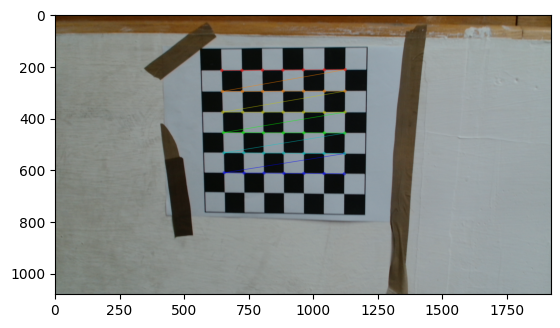

In [7]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

chessboardSize = (7,6)

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7, 3), np.float32)
objp[:, :2] = np.mgrid[0:7, 0:6].T.reshape(-1, 2)
# Arrays to store object points and image points from all the images.
objpoints = []  # 3d point in real world space
imgpoints = []  # 2d points in image plane.
images = glob.glob('ver.2/*.png')
for fname in images:
		img = cv2.imread(fname)
		gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
		# Find the chess board corners
		ret, corners = cv2.findChessboardCorners(gray, chessboardSize, None)
		# If found, add object points, image points (after refining them)
		if ret == True:
				objpoints.append(objp)
				print(len(objp))
				corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
				imgpoints.append(corners2)
				# Draw and display the corners
				cv2.drawChessboardCorners(img, chessboardSize, corners2, ret)

				rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
				plt.imshow(rgb_img)
